Ding, W., Zhang, L., Chen, J., & Shen, S. (2021). [Epsilon: An efficient planning system for automated vehicles in highly interactive environments](https://ieeexplore.ieee.org/abstract/document/9526613?casa_token=76U5mjERxyEAAAAA:akEXJo5sCY5uf6jWc3D4AIau3KBiZTElxLp1thhgz2hkZR3AXREgy3fgSnBFZZSDCTyhBJBIbfq3). IEEE Transactions on Robotics, 38(2), 1118-1138.
[github](https://github.com/HKUST-Aerial-Robotics/EPSILON)

**Abstract**
<!-- In this paper, we present an Efficient Planning System for automated vehicles In highLy interactive envirONments (EPSILON). EPSILON is an efficient interaction-aware planning system for automated driving, and is extensively validated in both simulation and real-world dense city traffic. It follows a hierarchical structure with an interactive behavior planning layer and an optimization-based motion planning layer. The behavior planning is formulated from a partially observable Markov decision process (POMDP), but is much more efficient than naively applying a POMDP to the decision-making problem. The key to efficiency is guided branching in both the action space and observation space, which decomposes the original problem into a limited number of closed-loop policy evaluations. Moreover, we introduce a new driver model with a safety mechanism to overcome the risk induced by the potential imperfectness of prior knowledge. For motion planning, we employ a spatio-temporal semantic corridor (SSC) to model the constraints posed by complex driving environments in a unified way. Based on the SSC, a safe and smooth trajectory is optimized, complying with the decision provided by the behavior planner. We validate our planning system in both simulations and real-world dense traffic, and the experimental results show that our EPSILON achieves human-like driving behaviors in highly interactive traffic flow smoothly and safely without being over-conservative compared to the existing planning methods. -->
在本文中, 我们提出了一种在高度交互环境中用于自动驾驶汽车的有效规划系统 (EPSILON)。
EPSILON是一种高效的自动驾驶交互感知规划系统, 在模拟和现实世界密集城市交通中都得到广泛的验证。
它**遵循分层结构, 包含一个交互行为规划层和一个基于优化的运动规划层**。
行为规划由部分可观察马尔可夫决策过程(POMDP)构建, 但比单纯地将POMDP应用于决策问题更加高效。
效率的关键是在**动作空间和观察空间中的guided branching**, 将原始问题分解为有限数量的闭环策略评估。
此外, 我们引入了一种具有安全机制的新驾驶员模型, 以克服(由先验知识的潜在不完善所导致的)风险。
对于运动规划, 我们**采用时空语义走廊(spatio-temporal semantic corridor, SSC)以统一的方式对(复杂驾驶环境带来的)约束进行建模**。
基于SSC, 一个安全平稳的轨迹被优化, 执行由行为规划器提供的决策。
我们在模拟和现实世界的密集交通中验证了我们的规划系统, 实验结果表明, 我们的EPSILON在高度交互的交通流中平稳安全地实现了类人驾驶行为, 与现有的规划方法相比, 不会过于保守。

# INTRODUCTION
<!-- Autonomous driving is an emerging topic, both in industry and in the academic community. Planning, as one of the core components of autonomous driving systems, largely determines the intelligence and user experience of the system. Despite there being many industrial demos illustrating promising autonomy, few methodological details are provided to show how pain points in planning are systematically dealt with. On the other hand, the academic community has presented various planning systems which cover several pain points, such as uncertainty and interaction modeling [1]–[9]. However, most of these methods are only validated through simulation or well-annotated datasets, leaving a question as to whether they can work on a real autonomous vehicle. Planning on a real vehicle with closed-loop execution is far more challenging. Onboard planning requires dealing with an imperfect world and interacting with other traffic participants naturally. The imperfectness and uncertainty come from a wide range of aspects, such as occlusion in sensing, detection and tracking noises, and unavoidable stochastic behaviors of other traffic participants, which are hard to reproduce in simulation. In this paper, we aim at building a robust and socially-compliant planning system which can handle the imperfect real world. -->
自动驾驶是工业界和学术界的新兴话题。
规划作为自动驾驶系统的核心部分之一, 在很大程度上决定了系统的智能性和用户体验。
尽管有许多工业演示展示了自动驾驶的前景, 但很少有方法论细节阐述如何系统地处理规划中的痛点。
另一方面, 学术界提出了各种规划系统, 涵盖了多个痛点, 包括不确定性和交互建模[1]-[9]。
然而, 这些方法中的大多数仅通过模拟或标注良好的数据集进行了验证, 留下了一个问题, 即它们是否可以在真实的自动驾驶汽车上工作。
在具有闭环执行的真实车辆上进行规划要困难得多。
车载规划理所当然地需要处理不完美世界, 以及与其他交通参与者的交互。
不完美性和不确定性来自很多方面, 例如感知遮挡、检测和跟踪噪声, 以及其他交通参与者的不可避免的随机行为, 这些很难在仿真中复现。
在本文中, 我们的目标是建立一个鲁棒的且符合社会规范的规划系统, 该系统能够处理不完美的现实世界。

In this paper, we present an Efficient Planning System for autonomous vehicles In highLy interactive envirONments (EPSILON). We systematically investigate several pain points of planning for autonomous driving, such as the modeling of uncertainty and multi-agent interaction, and attempt to achieve one small but concrete step towards automated driving in the real-world. We validate the performance of EPSILON by conducting long-term closed-loop autonomous driving in complex driving environments. EPSILON follows a hierarchical structure which consists of a behavior planning layer and a motion planning layer, as in many previous methods [7, 9, 10]. In EPSILON, the role of behavior planning is to generate a preliminary decision which is represented by a sequence of states covering the planning horizon, while the role of motion planning is to wrap the sequence of states to a safe and smooth trajectory for closed-loop execution.

There is an extensive literature on behavior planning for automated vehicles. Previous works [7]–[14] focused on a pure geometry perspective, and adopted various rule-based or search-based techniques, which typically assume a behavior/trajectory prediction module is equipped on the system. The prediction is conducted independent of planning, and when the prediction is provided, the planner plans a trajectory with a sufficiently large safety margin. However, it is impossible to yield a perfect prediction due to the stochastic nature of other traffic participants and onboard perception noise. Moreover, with such independent prediction, the mutual influence of the ego vehicle's and other vehicles' future motion cannot be modeled. In cooperative and interactive scenarios, such as gap merging, where this mutual influence is essential, coupled prediction and planning is more promising [15]. Partially observable Markov decision process (POMDP) [16] provides a mathematically rigorous form of modeling uncertainties and multi-agent interactions, while suffering from prohibitively high computational complexity. Several attempts [17, 18] have been made to accelerate the problem solving but are still not efficient enough for driving in complex environments [19, 20]. In this paper, we propose a guided branching technique to focus the exploration using domain knowledge, which is much more efficient and can work in highly dynamic city traffic.

Motion planning aims at generating a safe and smooth trajectory which faithfully follows the decision provided by the behavior layer. Our motion planning layer is adapted from our previous work [1], which follows an optimization-based scheme. All the constraints posed by complex semantics are encoded in a unified way using a spatio-temporal semantic corridor. The piecewise B´ezier curve is adopted as trajectory parameterization for its convex hull and hodograph properties which can enforce safety and dynamical feasibility for the entire trajectory. Benefiting from our optimization formulation, our motion planner can generate a safe and smooth trajectory as well as fit the preliminary behavior plan closely, significantly enhances the consistency of EPSILON.

The behavior planning layer of EPSILON was originally presented in our previous research [21]. In [21], although the interaction among traffic participants is captured using multi-agent forward simulation, it generally assumes other participants are rational. The rationality is reflected in the predefined multi-agent integration model. However, in realworld city driving, we find traffic participants are often noisily rational, especially in cities where the driving style is always aggressive. In this paper, we extend our previous work by integrating a more flexible interactive forward simulation model with a safety mechanism, which better guarantees safety, even when encountering over-aggressive traffic participants. The motion planning module of EPSILON was originally proposed in [1]. We advance the motion planner to incorporate multiagent interaction and unify behavior planning and motion planning. Moreover, we bring the newly designed system, EPSILON, into real-world dense traffic, while [1] and [21] are limited to only the simulation environment. We summarize our contributions as follows:
1) We present an efficient planning system by extending and tightly integrating our previous behavior planner [21] and motion planner [1]. The proposed new system deals with several pain points of automated driving systematically, including efficient interaction and uncertainty handling, improved consistency, and real-time implementation.
2) We enhance the robustness of the behavior planning layer by introducing a new forward simulation model, which better guarantees safety, even when encountering overaggressive or uncooperative traffic participants.
3) Moving beyond validation using only simulation and datasets, we extensively validate our system on a real automated vehicle in dense city traffic without an HDmap and purely relying on onboard sensor suites.
4) We release the complete decision-making and motion planning systems as open-source packages1 to the research community.

The remainder of this paper is organized as follows. The relevant literature is discussed in Section II. An overview of EPSILON is provided in Section III. The problem is formulated in Section IV. The behavior planning module is elaborated in Section V while the motion planning method is presented in Section VI. Implementation details are given in Section VII. Systematic comparisons and real-world experiments are illustrated in Section VIII. Finally, Section IX concludes this paper.

# RELATED WORK

# SYSTEM OVERVIEW
<!-- The structure of the proposed planning system is shown in Fig. 1. The planning system is built on top of the environment understanding and closed-loop execution modules. There are several modules in the perception pipeline: freespace detection [41], semantics detection (e.g., lane detection, traffic light detection, etc.), object detection and tracking. Note that HD-map is optional for our planning system. For onboard experiments on a real vehicle, we do not use HD-Map and purely rely on online lane detections. The output of perception is synchronized and fed to a semantic map manager module which is responsible for organizing the data structures and providing querying interfaces for planning modules. The semantic map is updated at 20 Hz and includes an occupancy grid for static obstacles, multiple tracklets for dynamic obstacles, and road structures for lanes and traffic semantics. -->
所提出的规划系统的结构如[图1](#fig.1)所示。
规划系统建立在环境理解和闭环执行模块之上。
**感知流水线中有几个模块: 自由空间检测[41]、语义检测(例如车道检测、交通灯检测)、物体检测和跟踪**。
请注意, 高清地图对于我们的规划系统是可选的。
对于真实车辆上的车载实验, 我们不使用高清地图, 而纯粹依靠在线车道检测。
**感知的输出被同步并传给语义地图管理器模块, 该模块负责组织数据结构并为规划模块提供查询接口**。
语义地图以20 Hz的频率更新, **包括静态障碍物的占用网格、动态障碍物的多个轨迹以及车道和交通语义的道路结构**。

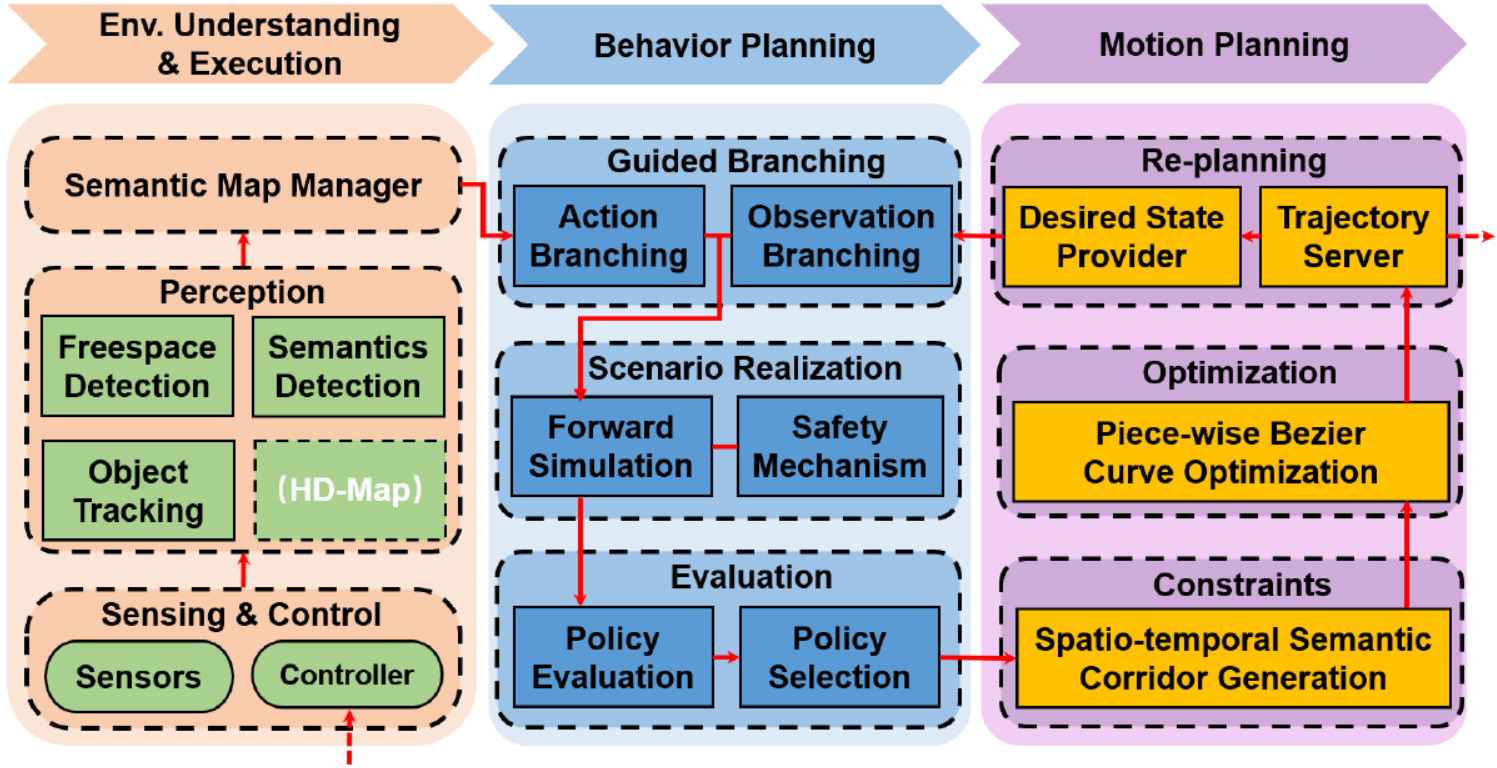
<!-- Fig. 1: A diagram of EPSILON together with environmental understanding and execution modules. HD-Map is optional for EPSILON. -->
图1: EPSILON图以及环境理解和执行模块。HD-Map对于EPSILON是可选的。

<!-- As mentioned previously, EPSILON follows a two-layer hierarchical structure, comprising a behavior planning layer and a motion planning layer. Note that there is no additional trajectory prediction module like in [1] since the trajectory predictor is coupled inside the behavior planner. At a high level, our behavior planner consists of three processes, namely, guided branching, scenario realization and evaluation. Essentially, guided branching is responsible for expanding action sequences according to predefined policies for the controlled vehicle and reasoning about the possible intentions of other traffic participants. By incorporating a particular ego action sequence with a particular intention combination of other traffic participants, we form a scenario. During scenario realization, we use closed-loop multi-agent forward simulation to realize the scenario step-by-step. Different from our previous work [21], we extend the forward simulation model into a more flexible driving model to achieve safe and human-like driving behavior, even in complex real-world traffic with quantities of noisily rational participants. -->
如前所述, EPSILON遵循两层的分层结构, 包括行为规划层和运动规划层。
请注意, 由于轨迹预测器耦合在行为规划器内部, 因此没有像[1]中那样的额外轨迹预测模块。
在上层中, 我们的**行为规划器包含三个过程, 即guided branching、场景实现和评估**。
本质上, **guided branching负责(根据受控车辆的预定义策略)扩展动作序列, 并推理其他交通参与者的可能意图**。
通过将具体的自车动作序列与其他交通参与者的具体意图组合集成, 我们构造了一个场景。
在场景实现过程中, 我们**使用闭环多智能体前向仿真, 逐步实现场景**。
与我们之前的工作[21]不同, 我们**将前向仿真模型扩展为更灵活的驾驶模型**, 以实现安全和类人的驾驶行为, 即使在(带有大量嘈杂的理性参与者的)复杂的现实世界交通中。

<!-- The motion planning layer basically follows our previous work [1]. Firstly, static, dynamic obstacles and constraints posed by environment semantics are modeled using a spatio-temporal semantic corridor around the initial guess provided by the behavioral layer. Then a piece-wise B$\grave{e}$zier curve is optimized with respect to the corridor. Using its convex hull property and hodograph property, the entire trajectory can be guaranteed to be safe and dynamically feasible. The generated trajectory is fed to a trajectory server for re-planning scheduling, and the desired state for re-planning can be queried from the trajectory server. The trajectory server is also responsible for sending out control commands to a vehicle controller to close the execution loop. -->
运动规划层基本遵循我们之前的工作[1]。
首先, **使用(行为层提供的初始猜测周围的)时空语义走廊对(环境语义生成的)静态、动态障碍和约束进行建模**。
然后**针对走廊优化分段的B$\grave{e}$zier曲线**。
**利用其凸包和时距曲线属性, 整个轨迹可以保证安全且动态可行**。
生成的轨迹被传递到轨迹服务器, 用于重新规划调度, 并且可以从轨迹服务器中查询重新规划的期望状态。
轨迹服务器还负责向车辆控制器发送控制命令以结束执行循环。


<!-- The design frequency for both layers is 20 Hz. In practice, the two layers can be assembled as a pipeline, which will increase the throughput of the whole planning system. -->
两层的设计频率均为20Hz。
实际上, 两层可以组装成一条流水线, 这将提高整个规划系统的吞吐量。

# PROBLEM FORMULATION

<!-- We firstly clarify the problem setup of the decision making and motion planning process of the ego agent. Let $\varepsilon_t$ denote the ego-centric local environment at time $t$, including road structures, traffic signals and the occupancy grid for static obstacles. Define $x_t^i$ as the state of the vehicle $i \in V$ at time $t$, and without loss of generality, $i = 0$ is reserved for the ego vehicle. As a notational convenience, subscript absence denotes all time steps, and superscript absence denotes all agents. For example, $x_t$ denotes the states of all vehicles at time $t$, while $x^i$ denotes the states at all time instances for vehicle $i$. For the planning cycle at time $t$, the ego agent receives the observation $z_t$, and uses it to estimate the real state $x_t$ for planning. We define the input of the behavior planning layer as $\left\langle z_t, \varepsilon_t \right\rangle$, and the output is a *decision* $\mathcal{D}_t$, which is parameterized by a sequence of discrete states $\mathcal{D}_t := \left[x_{t+1}, x_{t+2}, \dots , x_{t+H}\right]$ for all agents, where $H$ denotes the planning horizon. The input to the motion planning layer is $\left\langle \mathcal{D}_t, \varepsilon_t\right\rangle$, while the output is a smooth and safe trajectory (typically parameterized by splines) for controlling the ego vehicle. The reason that we decouple the behavior planning and motion planning layer is for higher efficiency. After decoupling, the behavior planner only needs to reason about the future scenario at a relatively coarse resolution, while the motion planning layer works in the local solution space given the decision $\mathcal{D}_t$. -->
我们首先阐明自车智能体的决策和运动规划过程的问题配置。
令 $\varepsilon_t$ 表示 $t$ 时刻以自车为中心的局部环境, 包括道路结构、交通信号和静态障碍物的占用网格。
定义 $x_t^i$ 为 $t$ 时刻车辆 $i \in V$ 的状态, 不失一般性, $i = 0$ 保留给自车。
为符号简便, 下标缺省表示所有时间步, 上标缺省表示所有智能体。
例如, $x_t$ 表示 $t$ 时刻所有车辆的状态, 而 $x^i$ 表示车辆 $i$ 在所有时刻实例的状态。
对于 $t$ 时刻的规划周期, 自车智能体接收观察值 $z_t$, 并使用它来估计规划的真实状态 $x_t$。
我们将行为规划层的输入定义为 $\left\langle z_t, \varepsilon_t \right\rangle$, 输出是一个*决策* $\mathcal{D}_t$, 它由所有代理的离散状态序列 $\mathcal{D}_t := [x_{t+1}, x_{t+2}, \dots , x_{t+H}]$ 参数化, 其中 $H$ 表示规划周期。
运动规划层的输入是 $\left\langle \mathcal{D}_t, \varepsilon_t\right\rangle$, 而输出是一个(用于控制自车的)平滑且安全的轨迹(通常由样条函数参数化)。
我们将行为规划和运动规划层解耦的原因是为了更高的效率。
解耦后, 行为规划器只需要以相对粗的分辨率推理未来场景, 而运动规划层则在(给定决策$\mathcal{D}_t$的)局部解空间中工作。

<!-- As mentioned in Section [I](#INTRODUCTION), in the real world, the planning system always suffers from unknown interactive patterns among traffic participants. To address this issue, we model the uncertainty-aware behavior planning problem in the form of the POMDP, after which we formulate it into a multiagent setting. A POMDP model can be defined as a tuple $\left\langle \mathcal{X}, \mathcal{A}, \mathcal{Z}, \mathcal{T}, \mathcal{O}, \mathcal{R} \right\rangle$, where $\mathcal{X}$, $\mathcal{A}$ and $\mathcal{Z}$ are the state space, action space and observation space, respectively. The function $T(x_{t-1}, a_t, x_t) = p(x_t | x_{t-1}, a_t)$ is the probabilistic state transition model, while $O(x_t, z_t) = p(z_t | x_t)$ is the observation model. These two functions reflect the stochastic property of the motion model and uncertain sensing. $R(x_{t-1}, a_t)$ is a real-valued reward function $R: \mathcal{X} \times \mathcal{A} \to \mathbb{R}$ for the agent taking action $a_t \in \mathcal{A}$ in state $x_{t-1} \in \mathcal{X}$. Since some states in real-world applications cannot be directly observed (e.g., hidden intentions or noisy measurements), the POMDP maintains the *belief* $b \in \mathcal{B}$, which is the probability distribution over $\mathcal{X}$. The belief can be updated after the agent leaves an initial belief $b_{t-1}$, and then takes an action $a_t$ and receives an observation $z_t$. The resulting belief state can be inferred using Bayes' rule: -->
如第[I](#INTRODUCTION)节所提到的, 在现实世界中, 规划系统经常受交通参与者之间未知交互模式影响。
为了解决这个问题, 我们以 POMDP 的形式对不确定的感知行为规划问题进行建模, 然后将其公式化为一个多智能体配置。
POMDP 模型可以定义为一个元组 $\left\langle \mathcal{X}, \mathcal{A}, \mathcal{Z}, \mathcal{T}, \mathcal{O}, \mathcal{R} \right\rangle$, 其中 $\mathcal{X}$、$\mathcal{A}$ 和 $\mathcal{Z}$ 分别为状态空间、动作空间和观察空间。
函数 $T(x_{t-1}, a_t, x_t) = p(x_t | x_{t-1}, a_t)$ 是概率状态转移模型, 而 $O(x_t, z_t) = p(z_t | x_t)$ 是观测模型。
这两个函数反映了运动模型和不确定感知的随机性。
$R(x_{t-1}, a_t)$ 是智能体在状态 $x_{t-1} \in \mathcal{X}$ 下采取动作 $a_t \in \mathcal{A}$ 的real-valued奖励函数$R:\mathcal{X} \times \mathcal{A} \to \mathbb{R}$。
因为现实世界应用中的一些状态无法直接被观察到(例如, 隐藏的意图或嘈杂的测量), POMDP 保持 *belief* $b \in \mathcal{B}$, 即 $\mathcal{X}$ 上的概率分布。
智能体从初始 belief $b_{t-1}$ 出发, 然后采取行动 $a_t$ 并收到观察 $z_t$ 后, belief 可以被更新。
使用贝叶斯规则可以推断最终的 belief 状态:
$$b_t(x_t) = p(x_t|z_t, a_t, b_{t-1}) = \eta O(x_t, z_t)\int_{x_{t-1} \in \mathcal{X}} T(x_{t-1}, a_t, x_t) b_{t-1}(x_{t-1}) dx_{t-1} \tag{1}$$
<!-- where $\eta$ is a normalizing factor. The POMDP is to find an optimal *policy* $\pi^*$ which maps the belief state to an action $\pi: \mathcal{B} \to \mathcal{A}$, maximizing the expected total discounted reward over the planning horizon: -->
其中 $\eta$ 是归一化因子。POMDP 旨在找到一个最优*策略* $\pi^*$, 将 belief 状态映射到动作 $\pi: \mathcal{B} \to \mathcal{A}$, 最大化规划周期内的预期总折扣奖励:
$$\pi^* := \mathop{\arg\min}\limits_{\pi} \mathbb{E} \left[
\sum_{t=t_0}^{t_H} \gamma^{t-t_0}R\left( x_t, \pi(b_t) \right) | b_{t_0} \right] $$
<!-- where $t_0$ is the current planning time and $\gamma \in [0, 1]$ is a discount factor. For online POMDPs, starting from an initial belief $b_{t_0}$ and expanding in action space $\mathcal{A}$ as well as observation space $\mathcal{Z}$ until a certain planning horizon $t_H$, a belief tree is built node by node. Then, an optimal policy is found by applying the Bellman equation on each internal node: -->
其中, $t_0$ 是当前规划时刻, $\gamma \in [0, 1]$ 是折扣因子。
对于在线 POMDP, 从初始 belief $b_{t_0}$ 开始, 在动作空间 $\mathcal{A}$ 和观察空间 $\mathcal{Z}$ 中扩展, 直到一个确定的规划周期 $t_H$, 逐个节点构建 belief 树。
然后, 通过在每个内部节点上应用贝尔曼方程, 找到最优策略:
$$ V^*(b) = \max_{a \in \mathcal{A}}Q^*(b, a) = \max_{a \in \mathcal{A}} \left\{ \int_{x \in \mathcal{X}} b(x) R(x, a)dx + \gamma \int_{z \in \mathcal{Z}} p(z | b, a)V^*\left(\tau(b, a, z)\right)dz \right\} $$
<!-- where $V^*(b) = \int_{s \in \mathcal{S}} V^*(s)b(s)ds$ is the optimal utility function for the belief state, and $Q^*(b, a)$ describes the optimal value of the belief-action pair. For more details about solving POMDPs, we refer interested readers to [16, 23]. -->
其中, $V^*(b) = \int_{s \in \mathcal{S}} V^*(s)b(s)ds$ 是 belief 状态的最优效用函数, $Q^*(b, a)$ 描述 belief-行动对的最优值。有关求解 POMDPs 的更多详细信息, 我们建议感兴趣的读者参阅[16, 23]。

<!-- Different from previous works [20, 25] that only use the single optimal action on the initial belief node as the final output, here, we extract a complete trace $S_t = \left[ b_t^*, a_{t+1}^*, z_{t+1}^*, b_{t+1}^*, \dots, b_{t+H}^* \right]$ on the belief tree by applying -->
与之前的研究[20, 25]不同, 它们仅使用初始 belief 节点上的单个最优动作作为最终输出, 在这里, 我们将
$$\begin{align} a_t^* & = \mathop{\arg\min}\limits_{a_t \in \mathcal{A}} Q^*(b_{t-1}, a_t) \\
z_t^* & = \mathop{\arg\min}\limits_{z_t \in \mathcal{Z}} p(z_t | b_{t-1}, a_t^*) \end{align}$$
反复地应用到动作分支和观察分支, 在 belief 树上提取一个完整踪迹$S_t = \left[ b_t^*, a_{t+1}^*, z_{t+1}^*, b_{t+1}^*, \dots, b_{t+H}^* \right]$。
<!-- on action branches and observation branches recurrently. The resulting trace contains the optimal action $a_t^*$ on each belief node $b_{t-1}^*$, and the most likely received observation $z_t^*$ given $a_t^*$. The final decision $\mathcal{D}_t$ can be generated by simply applying $x_t = \arg \max_x b_t^*(x)$ for each step in $\mathcal{S}_t$. Compared to a single optimal action, $\mathcal{D}_t$ contains much more holistic information about the environment and future forecasting, which are essential for the following motion planner. -->
得到的轨迹包含每个 belief 节点 $b_{t-1}^*$ 上的最优动作 $a_t^*$, 以及给定 $a_t^*$ 下最有可能收到的观察值 $z_t^*$。
仅通过对 $\mathcal{S}_t$ 中的每步应用 $x_t = \arg \max_x b_t^*(x)$, 可生成最终决策 $\mathcal{D}_t$。
与单个最优动作相比, $\mathcal{D}_t$ 包含有关环境和未来预测的更多整体信息, 这对后续的运动规划器至关重要。

Considering the driving scenario at time $t$ with $N$ agents, the full state can be written as $x_t = \left\{ x_t^0, x_t^1, \dots, x_t^N \right\} \in \mathcal{X}$, wherein $x_t^i \in \mathcal{X}^i$ is the $i$-th vehicle's state containing its position, velocity, acceleration, heading, and steering angle. Note that for surrounding vehicles, hidden states such as driving *intention* or *aggressiveness*, which can not be directly observed, are also included in $x_t^i, \forall i \neq 0$. In the driving scenario, the only thing we can control is the input signal (e.g., throttle/brake and steering) of the ego vehicle; in other words, we cannot directly determine the surrounding agents' actions. Therefore, we point out that the action of the original problem can be written as $a_t = a_t^0$, similarly, the action space $\mathcal{A}$ is equivalent to $\mathcal{A}^0$. The complete state transition model $T$ can be represented as a joint distribution of the full state $p\left(x_t | x_{t-1}, a_t\right) = p\left(x_t^0, \dots, x_t^N | x_{t-1}^0, \dots, x_{t-1}^N, a_t^0 \right)$ which is non-trivial to directly model. However, since most of the agents in real traffic, such as vehicle and bicycle, follow common traffic rules and physical principles (e.g., kinematics or dynamics), we can simplify the formulation by making reasonable assumptions for the surrounding agents and converting it into a multi-agent interactive model. We assign a probabilistic transition model with an action $a_t^i \in \mathcal{A}^i, \forall i \neq 0$ for each surrounding agent and assume that the instantaneous transitions of each vehicle are independent, resulting in

$$p\left( x_t | x_{t-1}, a_t \right) \approx \underbrace{p\left( x_t^0 | x_{t-1}^0, a_t^0 \right)}_\text{ego transition} \prod_{i=1}^N \int\limits_{\mathcal{A}^i} \underbrace{p\left(x_t^i | x_{t-1}^i, a_t^i\right)}_{i\text{-th agent's transition}}
\underbrace{p\left(a_t^i | x_{t-1}\right)}_\text{driver model} da_t^i, \tag{2}$$

which separates the controlled vehicle from the surrounding agents. In the formulation, $p\left(x_t^i | x_{t-1}^i, a_t^i\right)$ is the *assumed* transition model of the other agents that reflects the agent's low-level kinematics and $p\left(a_t^i | x_{t-1}\right)$ is the *assumed* driver model representing the high-level decision process of the other agents that provides appropriate control signals according to the driving context. In practice, the driver model can be user-defined or learned by data-driven approaches, and can be controlled by some latent states, such as intentions or aggressiveness, achieving diverse *maneuvers or driving styles*. Note that the ego action $a_t^0$ is generated by the predefined ego policy. The ego observation $z_t^0 = z_t$ contains the estimated position and velocities of other vehicles generated by the perception module. For the surrounding agents, we use the agents' poses as the origin and transform the ego observation $z_t^0$ into their coordinate frames as observation $z_t^i$. Since $z_t^i$ is fully determined by the ego observation, we can get $p(z_t | x_t) = \Pi_{i=0}^N p\left(z_t^i | x_t^i\right)$ assuming the observation processes are independent. Therefore, Eq. 1 can be factorized as

$$b_t(x_t) = \eta \cdot
\overbrace{p\left( z_t^0 | x_t^i \right) \int\limits_{\mathcal{X}^0} p\left( x_t^0 | x_{t-1}^0, a_t^0 \right) b_{t-1}^0 \left(x_{t-1}^0\right)dx_{t-1}^0}^\text{belief update for ego agent} \prod_{i=1}^N
\overbrace{p\left(z_t^i|x_t^i\right) \iint\limits_{\mathcal{X}^i\mathcal{A}^i}  p\left(x_t^i | x_{t-1}^i, a_t^i\right) p\left(a_t^i | x_{t-1}\right) b_{t-1}^i\left(x_{t-1}^i\right) da_t^i dx_{t-1}^i}^\text{belief update for other agents}
\tag{3}$$

We find that although the state transitions of each agent in each step are independent, the assumed driver models $p(a_t^i | x_{t-1})$ and observation models $p(z_t^i|x_t^i)$ leverage all agents' states and observations, making the belief update an interactive process. Note that the hidden states are estimated step-by-step during the belief update using observations, which is exactly the role of behavior prediction. As a consequence, the POMDP implicitly contains the prediction, indicating that planning and prediction are naturally coupled. It is also notable that methods which decouple prediction and planning are essentially simplifications of the original POMDP formulation.

By applying belief update recurrently, we can build the belief tree starting from the initial belief node and extract the final decision $\mathcal{D}_t$. However, the scale of the belief tree grows exponentially w.r.t. the tree depth, which is computationally intractable for real-time applications. To overcome this issue, in this paper, we apply domain knowledge into the formulation to further simplify the problem of achieving real-time decision-making in a fast-changing driving environment while preserving the ability to handle interactions and uncertainties. Given the output of behavior planner $\mathcal{D}_t$, the motion planning layer aims to generate a safe and smooth trajectory to realize the high-level decision in a fine-grained fashion. Note that since our behavior layer is formulated in a multi-agent setting, it naturally reasons about the future states for all the agents. Therefore, the role of the motion planning boils down to a local trajectory optimization problem, as shown in Fig. 2.

todo:
- https://zhuanlan.zhihu.com/p/529997988
- Ding, W., Zhang, L., Chen, J., & Shen, S. (2019). [Safe trajectory generation for complex urban environments using spatio-temporal semantic corridor](https://ieeexplore.ieee.org/abstract/document/8740885?casa_token=yXNddH84CNgAAAAA:21Waw5-0QjSU0C_t0496DeycsMvBIo91G76vfQH8_sKaAh0E-jXxs9fiy0gE5o5RR30DrocLXFSf). IEEE Robotics and Automation Letters, 4(3), 2997-3004.
- Zhang, L., Ding, W., Chen, J., & Shen, S. (2020, May). [Efficient uncertainty-aware decision-making for automated driving using guided branching](https://ieeexplore.ieee.org/abstract/document/9197302?casa_token=0jojPUW-yH4AAAAA:8x_WJK5fhd4CQylvRPnCnqMssW0CQz6B9YXuMjLmL9ohUNo-FHf72DxC8JnQYI1cKT9r0_oi9Ps4). In 2020 IEEE International Conference on Robotics and Automation (ICRA) (pp. 3291-3297). IEEE.
- Gertz, E. M., & Wright, S. J. (2003). [Object-oriented software for quadratic programming](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=f12b2a76bea266d0635dd0d71c5f8d5ab8cea6ca). ACM Transactions on Mathematical Software (TOMS), 29(1), 58-81. [website](https://pages.cs.wisc.edu/~swright/ooqp/)